# Deep Neural Network on the CIFAR10 Image Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
cifar = keras.datasets.cifar10
(x_train_full, y_train_full), (x_test, y_test) = cifar.load_data()

In [3]:
print(x_train_full.shape)
print(x_test.shape)
print(y_train_full.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


# Plot the image

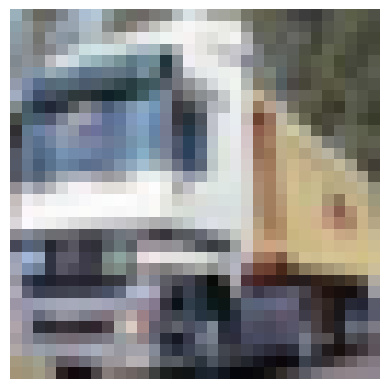

In [4]:
plt.imshow(x_train_full[1])
plt.axis('off')
plt.show()

In [5]:
y_train_full[1]

array([9], dtype=uint8)

In [6]:
x_train = x_train_full[5000:]
y_train = y_train_full[5000:]
x_valid = x_train_full[:5000]
y_valid = y_train_full[:5000]

# Functions for model code reuse

In [7]:
def create_callbacks(checkpoint_filepath, model_logs_directory):
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
    model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True)
    run_index = 1 # increment every time you train the model
    run_logdir = os.path.join(os.curdir, model_logs_directory + "/my_cifar10_logs", "run_bn_{:03d}".format(run_index))
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
    callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]
    return callbacks

def evauluate_model(model, x_test, y_test):
    results = model.evaluate(x_test, y_test)
    print("test loss, test accuracy:", results)

def build_model(hidden_layers=1, neurons=10, learning_rate=3e03, input_shape=[8], activation="relu", loss_func = "mse", optimizer=None):
    if optimizer is None:
        print("No optimizer given. Using SGD optimizer with 3e-3 learning rate")
        optimizer = keras.optimizers.SGD(learning_rate=3e-3)
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))

    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(neurons, activation=activation))

    model.add(keras.layers.Dense(10))

    
    model.compile(loss=loss_func, optimizer=optimizer)
    return model

# Build the Network

In [8]:
# static, throughout the notebook
layers = 20
neurons = 100

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(layers):
    model.add(keras.layers.Dense(neurons,
                                activation="elu",
                                kernel_initializer="he_normal"))

d:\Dev\Machine_Learning\tackleml\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


What is He Normal Initialization?

A weight initialization used with ReLU and its variants. Helps avoid issues like vanishing or exploding gradrients during training, which leads to faster convergence and better performance.

In [10]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
# Cross entropy loss function is an optimization function 
# which is used in case of training a classification model 
# which classifies the data by predicting the probability 
# of whether the data belongs to one class or the other class
loss_fn = keras.losses.SparseCategoricalCrossentropy()

In [12]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss=loss_fn, optimizer=optimizer, metrics=["accuracy"])

In [13]:
#output layer
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(
    loss=loss_fn,
    optimizer=optimizer,
    metrics=["accuracy"]
)

In [15]:
checkpoint_filepath = "my_cifar10_model.keras"
model_logs_directory = "my_model_logs"

callbacks = create_callbacks(checkpoint_filepath, model_logs_directory)

In [16]:
model.fit(x_train, y_train, epochs=100,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.0990 - loss: 2.3478 - val_accuracy: 0.1038 - val_loss: 2.3397
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0989 - loss: 2.3313 - val_accuracy: 0.1038 - val_loss: 2.3270
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0989 - loss: 2.3229 - val_accuracy: 0.1038 - val_loss: 2.3186
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0992 - loss: 2.3145 - val_accuracy: 0.1038 - val_loss: 2.3131
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0991 - loss: 2.3104 - val_accuracy: 0.1038 - val_loss: 2.3095
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0969 - loss: 2.3072 - val_accuracy: 0.1038 - val_loss: 2.3072
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1004 - loss: 2.3056 - val_accuracy: 0.1038 - val_loss: 2.3057
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0996 - loss: 

In [17]:
model = keras.models.load_model(checkpoint_filepath)
evauluate_model(model=model, x_test=x_valid, y_test=y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1019 - loss: 2.3026
test loss, test accuracy: [2.3027446269989014, 0.09200000017881393]


This model sucks, lets optimize

In [18]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())

for _ in range(layers):
    model.add(keras.layers.Dense(neurons, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))

model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

checkpoint_filepath = "my_cifar10_bn_model.keras"
model_logs_directory = "my_model_logs"

callbacks = create_callbacks(checkpoint_filepath=checkpoint_filepath, model_logs_directory=model_logs_directory)

model.fit(x_train, y_train, epochs=100,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model(checkpoint_filepath)
model.evaluate(x_valid, y_valid)


Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.2910 - loss: 1.9719 - val_accuracy: 0.4062 - val_loss: 1.6749
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4013 - loss: 1.6821 - val_accuracy: 0.4214 - val_loss: 1.6052
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4352 - loss: 1.5905 - val_accuracy: 0.4358 - val_loss: 1.5776
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4630 - loss: 1.5192 - val_accuracy: 0.4534 - val_loss: 1.5430
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4866 - loss: 1.4554 - val_accuracy: 0.4604 - val_loss: 1.5235
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5076 - loss: 1.3989 - val_accuracy: 0.4608 - val_loss: 1.5346
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5260 - loss: 1.3478 - val_accuracy: 0.4680 - val_loss: 1.5413
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5404 

[1.523534893989563, 0.4603999853134155]

In [19]:
evauluate_model(model=model, x_test=x_valid, y_test=y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4636 - loss: 1.5279
test loss, test accuracy: [1.523534893989563, 0.4603999853134155]


In [20]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(layers):
    model.add(keras.layers.Dense(neurons,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

checkpoint_filepath = "my_cifar10_selu_model.keras"
model_logs_directory = "my_model_logs"

callbacks = create_callbacks(checkpoint_filepath, model_logs_directory)

In [21]:
X_means = x_train.mean(axis=0)
X_stds = x_train.std(axis=0)
X_train_scaled = (x_train - X_means) / X_stds
X_valid_scaled = (x_valid - X_means) / X_stds
X_test_scaled = (x_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model(checkpoint_filepath)
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.2789 - loss: 2.0279 - val_accuracy: 0.3526 - val_loss: 1.7937
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3797 - loss: 1.7283 - val_accuracy: 0.4024 - val_loss: 1.7286
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4248 - loss: 1.6235 - val_accuracy: 0.4148 - val_loss: 1.7112
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4464 - loss: 1.5548 - val_accuracy: 0.4522 - val_loss: 1.5683
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4758 - loss: 1.4942 - val_accuracy: 0.4518 - val_loss: 1.5864
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4929 - loss: 1.4473 - val_accuracy: 0.4594 - val_loss: 1.5852
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5113 - loss: 1.4023 - val_accuracy: 0.4642 - val_loss: 1.5701
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5270 - loss: 

[1.5408231019973755, 0.47099998593330383]

In [22]:
evauluate_model(model=model, x_test=X_valid_scaled, y_test=y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4706 - loss: 1.5411
test loss, test accuracy: [1.5408231019973755, 0.47099998593330383]


In [23]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(layers):
    model.add(keras.layers.Dense(neurons,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

checkpoint_filepath = "my_cifar10_alpha_dropout_model.keras"
model_logs_directory = "my_model_logs"

callbacks = create_callbacks(checkpoint_filepath, model_logs_directory)

In [24]:
X_means = x_train.mean(axis=0)
X_stds = x_train.std(axis=0)
X_train_scaled = (x_train - X_means) / X_stds
X_valid_scaled = (x_valid - X_means) / X_stds
X_test_scaled = (x_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model(checkpoint_filepath)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.2803 - loss: 2.0663 - val_accuracy: 0.3898 - val_loss: 1.7209
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3864 - loss: 1.7267 - val_accuracy: 0.4350 - val_loss: 1.6076
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4328 - loss: 1.6066 - val_accuracy: 0.4506 - val_loss: 1.5836
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4697 - loss: 1.5210 - val_accuracy: 0.4796 - val_loss: 1.5388
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4928 - loss: 1.4572 - val_accuracy: 0.4818 - val_loss: 1.5226
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5165 - loss: 1.3966 - val_accuracy: 0.4878 - val_loss: 1.5265
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5355 - loss: 1.3483 - val_accuracy: 0.4804 - val_loss: 1.5193
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5538 - loss: 

In [25]:
evauluate_model(model=model, x_test=X_valid_scaled, y_test=y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4945 - loss: 1.5155
test loss, test accuracy: [1.5148922204971313, 0.49160000681877136]


The CIFAR 10 dataset is large, which presents a challenge for beginners such as myself. The challenge is magnified without the use of CNNs.